## <ins> Sleep Disorders and Heart Disease: A Machine Learning Exploration </ins>

### <ins> Abstract: </ins>

* This study investigates the interconnectedness between sleep disorders and heart disease by employing a machine learning model trained on a comprehensive dataset encompassing **sleep health and lifestyle factors.** 

* Validation of the model’s predictive capabilities is conducted using a heart disease-specific dataset, with a specific emphasis on understanding the association between sleep disorders and cardiovascular health. 

* Key factors influencing sleep disorders are identified and normalized. 

* Four machine learning algorithms are deployed, with model performance assessed using the **Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve.** 

* Data integration involves the utilization of a trained **Support Vector Machine (SVM)**model to predict sleep disorders in heart disease dataset (Cardio), which is then integrated with Sleep health and lifestyle dataset to create new dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

### <ins> Datasets: </ins>

1. **Cardio Dataset:**
    * This dataset contains 389 records of male patients data with 12 features. The target variable is the presence or absence of cardiovascular disease (CVD) in patients. The dataset is available on Kaggle.

2. **Sleep Health and Lifestyle Dataset:**
    * This dataset contains 1,000 records of patients data with 12 features. The target variable is the presence or absence of sleep disorders in patients. The dataset is available on Kaggle.

In [2]:
Dataset1 = pd.read_csv("./Datasets/HeartDisease.csv")
Dataset2 = pd.read_csv("./Datasets/SleepDisorder.csv")

### <ins>Key Factors Influencing Sleep Disorders:</ins>

1. **Age:** 
    * The risk of sleep disorders increases with age.
2. **Stress Level:** 
    * High stress levels can lead to sleep disorders.
3. **BMI Category:** 
    * Obesity can lead to sleep disorders.
4. **Blood Pressure:**
    * High blood pressure can lead to sleep disorders.

* These factors are selected by PCA.These factors are normalized to ensure that the model is not biased towards any particular feature.

* Dataset 2 is Splited into Train and Test data. The model is trained on the Train data and tested on the Test data. The model is then validated on the Cardio dataset.

* The Split ratio is **70:30**.

In [3]:
X = Dataset2[["Age", "Stress Level", "BMI Category", "Blood Pressure"]].values
Y = Dataset2["Sleep Disorder"].values
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y ,test_size = 0.3,random_state=1)

### <ins>Machine Learning Algorithms:</ins>

1. **K-Nearest Neighbors (KNN):**
    * KNN is a non-parametric algorithm that classifies data points based on their similarity to other data points in the dataset.

In [4]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, Y_train)
Pred_KNN = knn.predict(X_test)
Accuracy_KNN = metrics.accuracy_score(Y_test,Pred_KNN)
print("KNN Accuracy: ", Accuracy_KNN)

KNN Accuracy:  0.8947368421052632


2. **Support Vector Machine (SVM):**
    * SVM is a supervised learning algorithm that classifies data points by finding the hyperplane that best separates the classes.

In [5]:
svm = SVC(kernel="linear", random_state=42, shrinking=False)
svm.fit(X_train, Y_train)
Pred_SVM = svm.predict(X_test)
Accuracy_SVM = metrics.accuracy_score(Y_test, Pred_SVM)
Deci_SVM = svm.decision_function(X_test)
print("SVM Accuracy: ", Accuracy_SVM)

SVM Accuracy:  0.9298245614035088


3. **Logistic Regression:**
    * Logistic regression is a statistical model that predicts the probability of a binary outcome.

In [6]:
LogiReg = LogisticRegression(solver="lbfgs")
LogiReg.fit(X_train, Y_train)
Pred_LogiReg = LogiReg.predict(X_test)
Accuracy_LogiReg = metrics.accuracy_score(Y_test, Pred_LogiReg)
Deci_LogiReg = LogiReg.decision_function(X_test)
print("Logistic Regression Accuracy: ", Accuracy_LogiReg)

Logistic Regression Accuracy:  0.9122807017543859


4. **Gaussion Naive Bayes:**
    * Naive Bayes is a probabilistic algorithm that uses Bayes' theorem to predict the probability of a binary outcome.

In [7]:
Naive = GaussianNB()
Naive.fit(X_train, Y_train)
Pred_Naive = Naive.predict(X_test)
Accuracy_Naive = metrics.accuracy_score(Y_test, Pred_Naive)
Deci_Naive = Naive.predict_proba(X_test)
print("Naive Bayes Accuracy: ", Accuracy_Naive)

Naive Bayes Accuracy:  0.9122807017543859


### <ins>Model Evaluation:</ins>

AUC of the ROC curve is used to evaluate the performance of the model. The AUC value ranges from 0 to 1, with higher values indicating better performance.

In [8]:
knn_fpr, knn_tpr, knn_thr = roc_curve(Y_test, Pred_KNN)
auc_knn = auc(knn_fpr, knn_tpr)
svm_fpr, svm_tpr, svm_thr = roc_curve(Y_test, Deci_SVM)
auc_svm = auc(svm_fpr, svm_tpr)
logi_fpr, logi_tpr, logi_thr = roc_curve(Y_test, Deci_LogiReg)
auc_logi = auc(logi_fpr, logi_tpr)
naive_fpr, naive_tpr, naive_thr = roc_curve(Y_test, Pred_Naive)
auc_naive = auc(naive_fpr, naive_tpr)

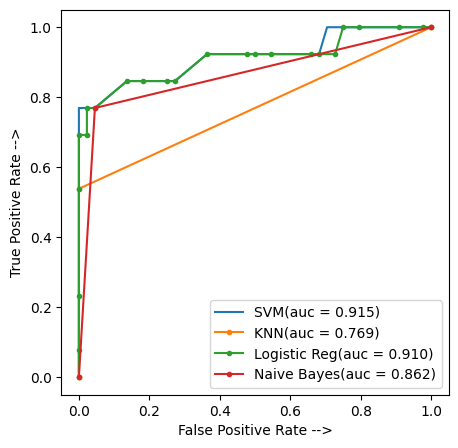

In [9]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle="-", label='SVM(auc = %0.3f)'%auc_svm)
plt.plot(knn_fpr, knn_tpr, marker=".", label='KNN(auc = %0.3f)'%auc_knn)
plt.plot(logi_fpr, logi_tpr, marker=".", label = 'Logistic Reg(auc = %0.3f)'%auc_logi)
plt.plot(naive_fpr, naive_tpr, marker=".", label='Naive Bayes(auc = %0.3f)'%auc_naive)

plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")

plt.legend()
plt.show()

### <ins>Feautre Integration:</ins>

The trained SVM model is used to predict sleep disorders in the Cardio dataset. The predicted values are then integrated with the Cardio dataset to create a new dataset.

In [10]:
Dataset1Cpy = Dataset1.copy(deep=True)
Dataset1X = Dataset1Cpy[["age", "exerciseangia", "serumcholestrol", "restingBP"]].values
PredictionsCardio = svm.predict(Dataset1X)
Dataset1Cpy["Sleep Disorder"] = PredictionsCardio
Acc_Dataset3 = metrics.accuracy_score(Dataset1Cpy["Heart Risk"].values,PredictionsCardio)
Dataset1Cpy.to_csv("./Datasets/Result.csv", index=False)

### <ins> Result </ins>

The Resulting Dataset with Sleeping Disorder feautre integrated with Cardio Dataset.

In [11]:
Dataset1Cpy.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,Heart Risk,Sleep Disorder
0,1017100,23,1,3,3,1,0,0,152,1,2.0,0,0,0,1
1,1221099,23,1,2,3,1,0,0,201,1,2.3,1,1,1,1
2,1472578,23,1,0,2,2,0,1,134,1,5.1,0,0,0,1
3,1765496,23,1,2,3,2,0,2,201,1,4.5,2,3,1,1
4,9403337,23,1,2,3,2,0,0,139,0,5.3,2,2,1,1
